# chapter 5 : Resampling Methods

#### Resampling methods, like cross-validation and the bootstrap, involve repeatedly sampling from training data to refit a model, 
#### providing insights into its variability and performance

##### They are computationally intensive but feasible with modern computing power. 
##### Cross-validation estimates test error for model assessment and selects model flexibility, 
##### while the bootstrap measures the accuracy of parameter estimates or statistical methods.

Key Terms:

##### *Resampling*: Repeatedly drawing samples from data to refit a model.
##### Cross-validation: Estimates test error to assess or select models.
##### Bootstrap: Measures accuracy of estimates or methods.
##### Model assessment: Evaluating model performance.
##### Model selection: Choosing the right model flexibility.

Linear Regression:
5-Fold CV RMSE: 9890.99 ± 668.86
Training RMSE: 9835.89

Decision Tree:
5-Fold CV RMSE: 47678.21 ± 2475.66


C:\Users\USER\AppData\Local\Temp\ipykernel_18744\2486548440.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([rmse_scores_linear, rmse_scores_tree], labels=['Linear Regression', 'Decision Tree'])


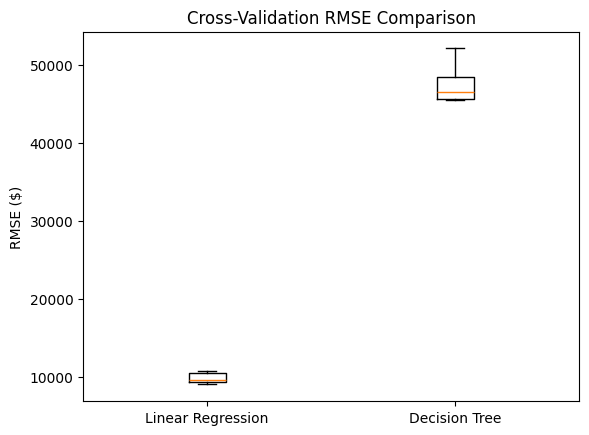

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic house price data
# 1000 samples, 3 features (e.g., size, bedrooms, location score)
X, y = make_regression(n_samples=1000, n_features=3, noise=10, random_state=42)

# Scale y to represent house prices (e.g., in $1000s)
y = y * 1000 + 200000  # Simulate prices around $200,000 with variation

# 2. Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# 3. Perform 5-fold cross-validation for linear regression
# Use negative mean squared error (common in scikit-learn), convert to RMSE
cv_scores_linear = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_linear = np.sqrt(-cv_scores_linear)  # Convert to positive RMSE

# 4. Perform 5-fold cross-validation for decision tree
cv_scores_tree = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_tree = np.sqrt(-cv_scores_tree)

# 5. Calculate training error for linear regression (for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model.fit(X_train, y_train)
y_train_pred = linear_model.predict(X_train)
training_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# 6. Print results
print("Linear Regression:")
print(f"5-Fold CV RMSE: {rmse_scores_linear.mean():.2f} ± {rmse_scores_linear.std():.2f}")
print(f"Training RMSE: {training_rmse:.2f}")
print("\nDecision Tree:")
print(f"5-Fold CV RMSE: {rmse_scores_tree.mean():.2f} ± {rmse_scores_tree.std():.2f}")

# 7. Visualize CV errors
plt.boxplot([rmse_scores_linear, rmse_scores_tree], labels=['Linear Regression', 'Decision Tree'])
plt.ylabel('RMSE ($)')
plt.title('Cross-Validation RMSE Comparison')
plt.show()

Linear Regression:
5-Fold CV RMSE: 9890.99 ± 668.86
Training RMSE: 9835.89

Decision Tree:
5-Fold CV RMSE: 47678.21 ± 2475.66
Training RMSE: 35675.12


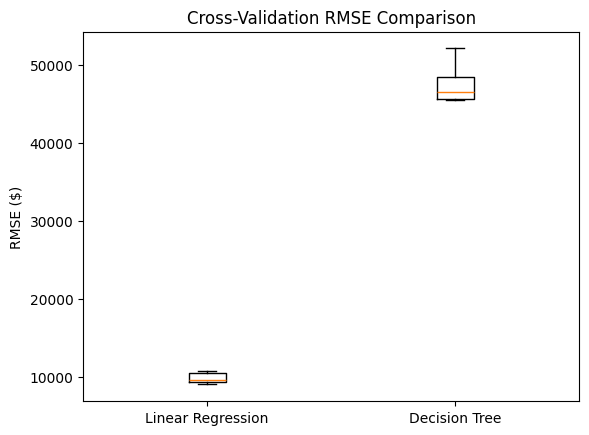

In [2]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic house price data
X, y = make_regression(n_samples=1000, n_features=3, noise=10, random_state=42)
y = y * 1000 + 200000  # Simulate prices around $200,000

# 2. Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# 3. Perform 5-fold cross-validation for linear regression
cv_scores_linear = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_linear = np.sqrt(-cv_scores_linear)

# 4. Perform 5-fold cross-validation for decision tree
cv_scores_tree = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_tree = np.sqrt(-cv_scores_tree)

# 5. Calculate training errors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression training error
linear_model.fit(X_train, y_train)
y_train_pred_linear = linear_model.predict(X_train)
training_rmse_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))

# Decision tree training error
tree_model.fit(X_train, y_train)
y_train_pred_tree = tree_model.predict(X_train)
training_rmse_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))

# 6. Print results
print("Linear Regression:")
print(f"5-Fold CV RMSE: {rmse_scores_linear.mean():.2f} ± {rmse_scores_linear.std():.2f}")
print(f"Training RMSE: {training_rmse_linear:.2f}")
print("\nDecision Tree:")
print(f"5-Fold CV RMSE: {rmse_scores_tree.mean():.2f} ± {rmse_scores_tree.std():.2f}")
print(f"Training RMSE: {training_rmse_tree:.2f}")

# 7. Visualize CV errors (fix deprecated 'labels' parameter)
plt.boxplot([rmse_scores_linear, rmse_scores_tree], tick_labels=['Linear Regression', 'Decision Tree'])
plt.ylabel('RMSE ($)')
plt.title('Cross-Validation RMSE Comparison')
plt.show()

In [3]:
import pandas as pd
import faker
import random
import numpy as np

fake = faker.Faker()
# Generate Student Data
students = [
    {
        "student_id": f"S{i:03d}",
        "name": fake.name(),
        "age": random.randint(18, 25),
        "gender": random.choice(["M", "F", "Other"]),
        "program": random.choice(["Computer Science", "Biology", "History"]),
        "enrollment_date": fake.date_between(start_date="-2y", end_date="today"),
        "gpa": round(np.random.normal(3.0, 0.5), 2),
        "course_ids": random.sample(["C101", "C102", "C103"], k=random.randint(1, 3))
    }
    for i in range(10000)
]
pd.DataFrame(students).to_csv("students.csv", index=False)

# Lab: Linear Models and Regularization

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [75]:
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise ,
sklearn_selected ,
sklearn_selection_path)
!pip install l0bnb
from l0bnb import fit_path


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.4 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.9 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 2.3 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.5 MB/s eta 0:00:00
   --

# Subset Selection Methods

In [76]:
Hitters = load_data('Hitters')
np.isnan(Hitters['Salary']).sum()

59

In [77]:
Hitters = Hitters.dropna();
Hitters.shape

(263, 20)

In [78]:
def nCp(sigma2, estimator, X, Y):
    """
    Negative Cp statistic.
    
    Parameters:
    sigma2: Estimated error variance
    estimator: A fitted model with a .predict() method
    X: Feature matrix
    Y: Target vector
    
    Returns:
    Negative Cp statistic
    """
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat) ** 2)
    return -(RSS + 2 * p * sigma2) / n


In [79]:
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
Y = np.array(Hitters['Salary'])
X = design.transform(Hitters)
sigma2 = OLS(Y,X).fit().scale


In [80]:
neg_Cp = partial(nCp , sigma2)

In [81]:
strategy = Stepwise.first_peak(design ,
                        direction='forward',
                        max_terms=len(design.terms))

In [82]:
strategy = Stepwise.first_peak(
    design,
    direction='forward',
    max_terms=len(design.terms)
)


In [83]:
hitters_MSE = sklearn_selected(OLS ,
strategy)
hitters_MSE.fit(Hitters , Y)
hitters_MSE.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Errors',
 'Hits',
 'HmRun',
 'League',
 'NewLeague',
 'PutOuts',
 'RBI',
 'Runs',
 'Walks',
 'Years')

In [84]:
hitters_Cp = sklearn_selected(OLS ,
strategy ,
scoring=neg_Cp)
hitters_Cp.fit(Hitters , Y)
hitters_Cp.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Hits',
 'PutOuts',
 'Walks')

In [86]:
strategy = Stepwise.fixed_steps(design ,
len(design.terms),
direction='forward')
full_path = sklearn_selection_path(OLS , strategy)
full_path 

sklearn_selection_path(model_type=<class 'statsmodels.regression.linear_model.OLS'>,
                       strategy=Strategy(initial_state=(), candidate_states=<bound method Stepwise.candidate_states of <ISLP.models.strategy.Stepwise object at 0x0000020795956690>>, build_submodel=<bound method ModelSpec.build_submodel of ModelSpec(terms=Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object'))>, check_finished=functools.partial(<function fixed_steps at 0x000002078EE25F80>, 19), postprocess=functools.partial(<function _postprocess_fixed_steps at 0x000002078EE260C0>, 19)))

In [87]:
full_path.fit(Hitters , Y)
Yhat_in = full_path.predict(Hitters)
Yhat_in.shape


(263, 20)

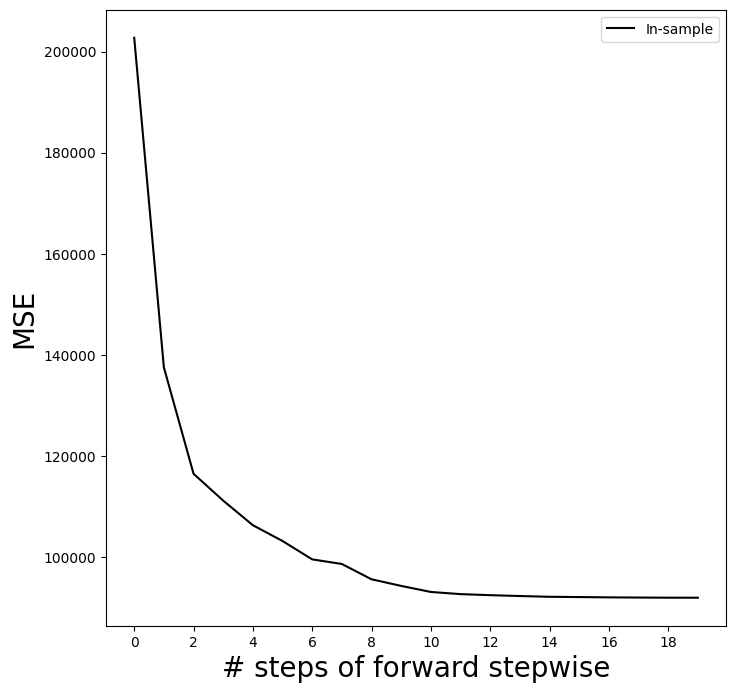

In [88]:
mse_fig , ax = subplots(figsize =(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
insample_mse ,
'k', # color black
label='In-sample')
ax.set_ylabel('MSE',
fontsize =20)
ax.set_xlabel('# steps of forward stepwise',
fontsize =20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()

In [89]:
K = 5
kfold = skm.KFold(K,
random_state=0,
shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path ,
Hitters ,
Y,
cv=kfold)
Yhat_cv.shape

(263, 20)

In [91]:
cv_mse = []
for train_idx , test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx] - Y[test_idx ,None])**2
    cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
cv_mse.shape

(20, 5)

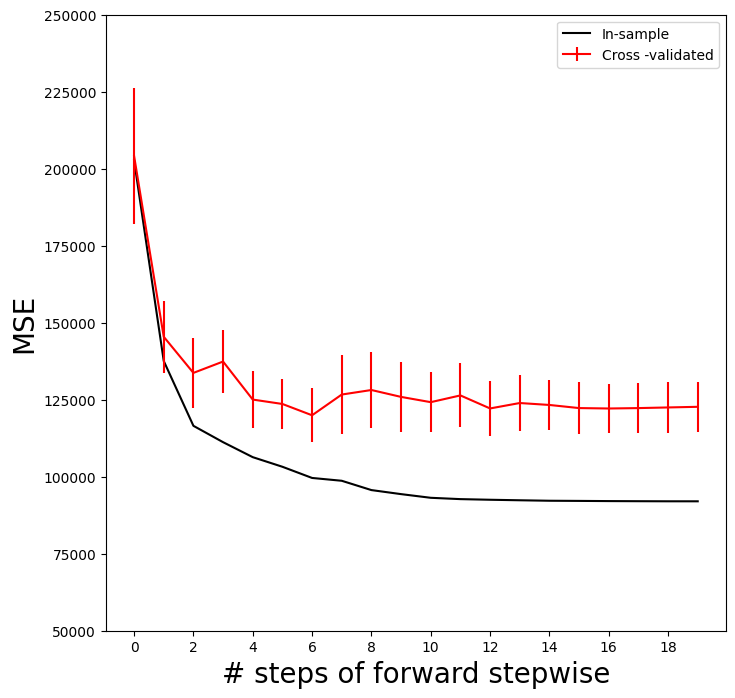

In [92]:
ax.errorbar(np.arange(n_steps),
cv_mse.mean(1),
cv_mse.std(1) / np.sqrt(K),
label='Cross -validated',
c='r') # color red
ax.set_ylim ([50000 ,250000])
ax.legend()
mse_fig

In [105]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Convert categorical columns to numeric
Hitters_numeric = pd.get_dummies(Hitters)

validation = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_idx, test_idx in validation.split(Hitters_numeric):
    full_path.fit(Hitters_numeric.iloc[train_idx], Y[train_idx])
    Yhat_val = full_path.predict(Hitters_numeric.iloc[test_idx])
    errors = (Yhat_val - Y[test_idx])**2
    validation_mse = errors.mean()

print("Validation MSE:", validation_mse)


Validation MSE: 5.2278041047963976e-23


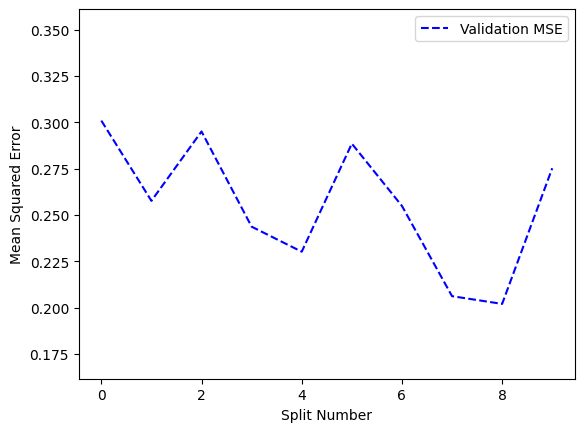

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

# Example: Suppose you already have Hitters DataFrame and target Y
# For demo, I'll create synthetic data (replace this with your real Hitters & Y)

# --- START of synthetic data setup ---
np.random.seed(0)
n_samples = 200
X = pd.DataFrame({
    'Feature1': np.random.randn(n_samples),
    'Feature2': np.random.choice(['A', 'B', 'C'], size=n_samples),  # categorical
    'Feature3': np.random.randn(n_samples),
})
Y = X['Feature1'] * 2 + (X['Feature3'] * -1.5) + np.random.randn(n_samples) * 0.5

# Convert categorical columns to numeric dummies
Hitters_numeric = pd.get_dummies(X)
# --- END of synthetic data setup ---

# Define the model
full_path = LinearRegression()

# Define ShuffleSplit with multiple splits
validation = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

validation_mse_list = []

for train_idx, test_idx in validation.split(Hitters_numeric):
    full_path.fit(Hitters_numeric.iloc[train_idx], Y.iloc[train_idx])
    Yhat_val = full_path.predict(Hitters_numeric.iloc[test_idx])
    errors = (Yhat_val - Y.iloc[test_idx]) ** 2
    validation_mse = errors.mean()
    validation_mse_list.append(validation_mse)

# Plotting the MSEs over splits
n_steps = len(validation_mse_list)
x_vals = np.arange(n_steps)

fig, ax = plt.subplots()
ax.plot(x_vals, validation_mse_list, 'b--', label='Validation MSE')  # blue dashed line
ax.set_xticks(x_vals[::2])  # show every other tick on x-axis
ax.set_ylim([min(validation_mse_list)*0.8, max(validation_mse_list)*1.2])  # y limits a bit padded
ax.set_xlabel("Split Number")
ax.set_ylabel("Mean Squared Error")
ax.legend()
plt.show()


In [110]:
D = design.fit_transform(Hitters)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

In [113]:
path = fit_path(X,
Y,
max_nonzeros=X.shape [1])
path[3]

Preprocessing Data.


Exception: Dot product shape mismatch, (200,) vs (263, 19)